In [1]:
import cv2 as cv
import numpy as np
import os
import csv

import matplotlib.pyplot as plt
import matplotlib.image as mping

from skimage import io
from skimage.io import imread, imread_collection
from skimage import color, data, filters, measure, morphology

In [2]:
# path
fundus_path = '/Users/feiwu/fw/VRES/dataset/all/images/'
green_path = '/Users/feiwu/fw/VRES/dataset/all/results/green_channel/'
filter_path = '/Users/feiwu/fw/VRES/dataset/all/results/filter/'
vessel_path = '/Users/feiwu/fw/VRES/dataset/all/results/vessel/'

fundus_images = []
fundus_src = []

# collect fundus images
for img in os.listdir(fundus_path):
    if img == '.DS_Store':
        continue
    # save fundus source paths
    fundus_src.append(os.path.join(fundus_path, img))
    
    # collect image items
    f_image = mping.imread(os.path.join(fundus_path, img))
    fundus_images.append(f_image)
    
print('Total: ' + str(len(fundus_images)))
print(fundus_src[0])


Total: 45
/Users/feiwu/fw/VRES/dataset/all/images/01_h.jpg


(2336, 3504, 3)


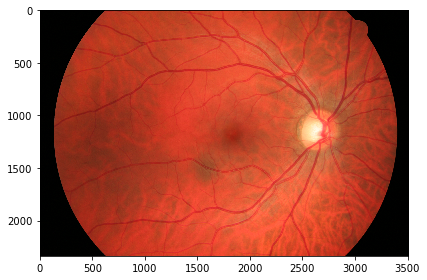

In [3]:
# display example
io.imshow(fundus_images[0])
print(fundus_images[0].shape)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
green_channel_img = []
filter_img = []
vessel_img = []

plt.set_cmap('gray')

for src in fundus_src:
    # get each image label
    g_name = src[40:]
    
    # Step 1: extract green channel values
    green_channel_values = cv.imread(src, cv.IMREAD_UNCHANGED)
    green_channel = green_channel_values[:,:,1]
    # save 
    cv.imwrite(os.path.join(green_path, g_name), green_channel)
    
    # Step 2: apply the filter 
    # Filter an image with the Sato tubeness filter
    # This filter can be used to detect continuous ridges. 
    # It can be used to calculate the fraction of the whole image containing such object.
    t0, t2 = filters.threshold_multiotsu(green_channel, classes = 3)
    mask = (green_channel > t0)
    filter_result = filters.sato(green_channel, sigmas = range(1, 10)) * mask
    # save 
    #cv.imwrite(os.path.join(filter_path, g_name), filter_result)
    #io.imsave(os.path.join(filter_path, g_name), filter_result)
    plt.imsave(os.path.join(filter_path, g_name), filter_result)
    
    # Step 3: extract vessel 
    vessel = filters.apply_hysteresis_threshold(filter_result, 0.01, 0.03)
    # save 
    #cv.imwrite(os.path.join(vessel_path, g_name), vessel)
    io.imsave(os.path.join(vessel_path, g_name), vessel)
    #plt.imsave(os.path.join(vessel_path, g_name), vessel)
    
    # collect different processing results
    green_channel_img.append(green_channel)
    filter_img.append(filter_result)
    vessel_img.append(vessel)

    


<Figure size 432x288 with 0 Axes>

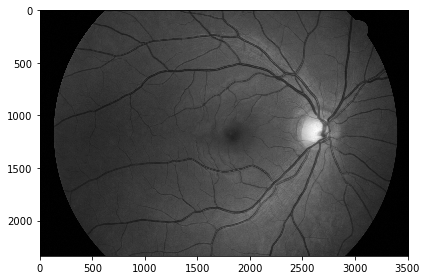

In [6]:
# green channel image example
io.imshow(green_channel_img[0])

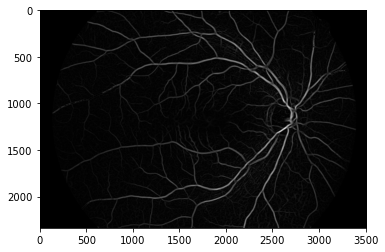

In [7]:
plt.imshow(filter_img[0])


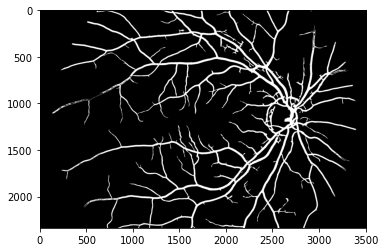

In [8]:
plt.imshow(vessel_img[0])

In [9]:
print(len(vessel_img))

45
